# Analyze Phönix database

* property of RWTH Aachen, https://www-i6.informatik.rwth-aachen.de/~forster/database-rwth-phoenix.php

In [1]:
import numpy as np
import pandas as pd
import os

import xml.etree.cElementTree as et

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def corpus2pandas(filename):
    
    parsed_xml = et.parse(filename)
    dfcols = ['sVideo', 'sSegment', 'sWord']
    df_xml = pd.DataFrame(columns=dfcols)

    for recording in parsed_xml.getroot():
        recording_name = recording.attrib.get('name')
        
        segment = recording.find('segment')
        if segment == None:
            segment_name = None
            orth_name = None
        else:
            segment_name = segment.get('name')
            
            orth = segment.find('orth')
            if orth == None: orth_name = None
            else: orth_name = orth.text.replace('\n', '').replace(' ', '')

        df_xml = df_xml.append(
            pd.Series([recording_name, segment_name, orth_name], index=dfcols),
            ignore_index=True)
    
    return(df_xml)

In [3]:
#os.chdir("/Users/Frederik/Dev/sign-language/01-explore")
#os.getcwd()

In [4]:
os.chdir("../datasets/02-phoenix")
os.getcwd(), os.listdir()

('/Users/Frederik/Dev/sign-language/datasets/02-phoenix',
 ['variants',
  '.DS_Store',
  'test',
  '_tar',
  'RWTH-PHOENIX-Weather-Signer03-cutout.train.corpus',
  'RWTH-PHOENIX-Weather-Signer03-cutout.test.corpus',
  'train'])

In [14]:
dfTrain = corpus2pandas("RWTH-PHOENIX-Weather-Signer03-cutout.train.corpus").iloc[1:,:]

In [15]:
dfTrain.head()

,sVideo,sSegment,sWord
1,01May_2010_Saturday_tagesschau_default_wort-0,1,HEUTE
2,01May_2010_Saturday_tagesschau_default_wort-1,1,WETTER
3,01May_2010_Saturday_tagesschau_default_wort-2,1,SEHEN
4,01May_2010_Saturday_tagesschau_default_wort-3,1,MORGEN
5,01May_2010_Saturday_tagesschau_default_wort-4,1,SONNTAG


In [16]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 1 to 3174
Data columns (total 3 columns):
sVideo      3174 non-null object
sSegment    3174 non-null object
sWord       3174 non-null object
dtypes: object(3)
memory usage: 74.5+ KB


In [17]:
dfTrain.sWord.unique()

array(['HEUTE', 'WETTER', 'SEHEN', 'MORGEN', 'SONNTAG', 'ZWEITE', 'MAI',
       '[OFF]', 'NORD', 'MITTE', 'EUROPA', 'KALT', 'TIEF', 'cl-KOMMEN',
       'DEUTSCH', 'loc-REGION', 'WARM', 'EINIGERMASSEN', 'ABEND', 'SUED',
       'REGEN', 'SUEDOST', 'KLAR', 'cl-WOLKE', 'UEBERWIEGEND', 'AUCH',
       'STARK', 'BESONDERS', 'NACH', 'MITTAG', 'GEWITTER', 'NORDWEST',
       'FREUNDLICH', 'SO', '[ON]', 'SCHWACH', 'MASS', 'WEHEN', 'WIND',
       'SONST', 'WENN', 'ZEHN', 'HOCH', 'EINS', 'BODEN', 'DIENSTAG',
       'MEHR', 'MITTWOCH', 'BISSCHEN', 'OST', 'DRUCK', 'SCHON', 'WEST',
       'GLEICH', 'ZEIT', 'VERLAUF', 'ABER', 'TROCKEN', 'TEIL', 'DANN',
       'TAG', 'FRISCH', 'KOENNEN', 'LANG', 'NUR', 'ZWEI', 'ZWOELF',
       'TEMPERATUR', 'FREITAG', 'VIEL', 'BERG', 'SCHNEE', 'MANCHMAL',
       'SONNE', 'SAMSTAG', 'WAHRSCHEINLICH', 'loc-IX', 'SELTEN', '[PU]',
       'JETZT', 'DRITTE', 'FEBRUAR', 'VORSICHT', 'GLATT', 'VOGEL',
       'MINUS', 'IN-KOMMENDEN', 'DONNERSTAG', 'DABEI', 'VIERTE',
       'DEZEM

In [18]:
print("%d training videos, %d different words" % (dfTrain.shape[0], dfTrain.sWord.unique().shape[0]))

3174 training videos, 266 different words


In [19]:
dfWord_freq = dfTrain.groupby("sWord").size().sort_values(ascending=False).reset_index(name="nCount")
dfWord_freq.iloc[:20,:]

,sWord,nCount
0,REGEN,153
1,cl-WOLKE,127
2,loc-REGION,118
3,HEUTE,106
4,loc-IX,105
5,[OFF],99
6,MORGEN,86
7,WIND,80
8,SCHNEE,80
9,ABEND,68


In [20]:
dfWord_freq["nCumSum"] = dfWord_freq.nCount.cumsum()

(<matplotlib.axes._subplots.AxesSubplot at 0x1a0aab4eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a0a5c2470>)

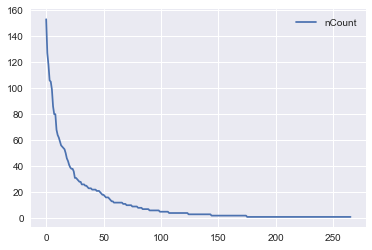

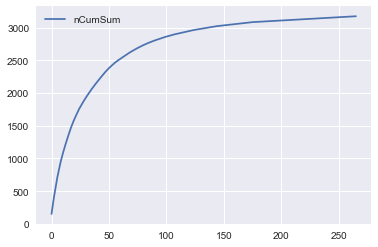

In [21]:
dfWord_freq.plot(y="nCount", ), dfWord_freq.plot(y="nCumSum")

In [23]:
dfWord_freq.query("nCount >= 80").tail()

,sWord,nCount,nCumSum
4,loc-IX,105,609
5,[OFF],99,708
6,MORGEN,86,794
7,WIND,80,874
8,SCHNEE,80,954


---
## Summary of training data

Total: 3174 training videos, 266 different words

* Min 50 occurences: 17 words, total of 1,475 videos
* Min 20 occurences: 47 words, total of 2,326 videos
* Min 10 occurences: 74 words, total of 2,680 videos

---

In [151]:
dfTest = corpus2pandas("RWTH-PHOENIX-Weather-Signer03-cutout.test.corpus").iloc[1:,:]

In [156]:
dfTest.head()

,sVideo,sSegment,sWord
1,01May_2010_Saturday_tagesschau_default_wort-0,1,TAG
2,01May_2010_Saturday_tagesschau_default_wort-1,1,NORDOST
3,01May_2010_Saturday_tagesschau_default_wort-2,1,ZWOELF
4,01May_2010_Saturday_tagesschau_default_wort-3,1,SUED
5,01May_2010_Saturday_tagesschau_default_wort-4,1,BAYERN


In [153]:
print("%d test videos, %d different words" % (dfTest.shape[0], dfTest.sWord.unique().shape[0]))

485 test videos, 118 different words


In [154]:
os.chdir("variants")
os.getcwd()

'/Users/Frederik/Dev/sign-language/data-download/phoenix/variants'

In [155]:
os.listdir()

['RWTH-PHOENIX-Weather-Signer03-cutout-variants.test.corpus',
 'RWTH-PHOENIX-Weather-Signer03-cutout-variants.train.corpus']

In [157]:
dfTrain_var = corpus2pandas("RWTH-PHOENIX-Weather-Signer03-cutout-variants.train.corpus").iloc[1:,:]

In [160]:
dfTrain_var.head()

,sVideo,sSegment,sWord
1,01May_2010_Saturday_tagesschau_default_wort-0,1,HEUTE#1runter
2,01May_2010_Saturday_tagesschau_default_wort-1,1,WETTER#2
3,01May_2010_Saturday_tagesschau_default_wort-2,1,SEHEN#2
4,01May_2010_Saturday_tagesschau_default_wort-3,1,MORGEN#short1b
5,01May_2010_Saturday_tagesschau_default_wort-4,1,SONNTAG#1


In [162]:
print("%d train videos, %d different word-variants" % (dfTrain_var.shape[0], dfTrain_var.sWord.unique().shape[0]))

3174 train videos, 702 different word-variants


In [163]:
dfTrain_var.sWord.unique()[:100]

array(['HEUTE#1runter', 'WETTER#2', 'SEHEN#2', 'MORGEN#short1b',
       'SONNTAG#1', 'ZWEITE#2', 'MAI#1', '[OFF]#1', 'NORD#mo', 'MITTE#1',
       'EUROPA#1', 'KALT#ksingl', 'TIEF#6', 'cl-KOMMEN#5rlrhk',
       'DEUTSCH#1', 'loc-REGION#5rkuz', 'KALT#2', 'loc-REGION#5rrlhk',
       'WARM#2', 'EINIGERMASSEN#1', 'ABEND#short1b_short1c', 'SUED#1',
       'REGEN#1', 'SUEDOST#1', 'REGEN#5_short5c',
       'NORD#mo_or_ro_ol_lo_ol', 'KLAR#1kante', 'MORGEN#1', 'cl-WOLKE#1',
       'UEBERWIEGEND#1', 'REGEN#1_short1', 'REGEN#5', 'AUCH#short1',
       'STARK#1', 'REGEN#1_1', 'BESONDERS#1', 'NACH#1', 'MITTAG#2',
       'GEWITTER#1', 'NORDWEST#mo_o2_2r_r2_2o', 'FREUNDLICH#3',
       'SO#short1', '[ON]#nothing', 'NORD#mo_or_ro', 'SCHWACH#short1',
       'MASS#5', 'NORD#4', 'WEHEN#10', 'WIND#7', 'WIND#15', 'SONST#1',
       'loc-REGION#5rlrhk', 'WEHEN#4', 'WENN#1', 'WIND#short2',
       'HEUTE#fausthoch', 'ZEHN#1', 'HOCH#2runter_2hoch', 'EINS#1',
       'loc-REGION#many', 'BODEN#1', 'DIENSTAG#1', 'SUED